## **APS1022 Week 2 Project**


Team 16:



> Haowen Li 1008399289

> Pai Peng 1002735394

> Liyan Liu 1002896100k





Colab url: https://colab.research.google.com/drive/1dmocALUHBHHsgeHQK31QN9SUHduYTJlX#scrollTo=vkinbSTo4f3x

# 1.0 Summary



Asset pricing has always been of fundamental importance to modern financial
 system. This is especially true when we are talking about pricing derivatives – which grows in popularity ever since created and has surpassed the volume of actual stock market by far. There are already plentiful discussions around the rather challenging task to price options. In the following sessions, we will mainly be focusing on pricing specific kinds of options using Monte Carlo Simulation and Lattice method. The methodology and implementations are learned from “Pricing American Options Using Monte Carlo Simulation” by Nairn McWilliams who discussed the concepts involved and pros and cons of the methods in depth.



The properties we are including are: 1) Asian Call 2) Asian Put 3) Lookback Call 4) Lookback Put 5) Floating lookback Call 6) Floating lookback Put and 7) American Put options. These options diverge  in payoff due to the mechanism used when being exercised are different. Though most of the options are similar in a way that they can only be exercise at maturity (in our case 2 months) except for American Put option which can be exercised at any time. Therefore, American Put option is treated as a special case and pricing strategy for it is implemented separately.


> Furthermore, we are given the following information:  



1. Risk-free rate is 2% annually. 

2. The stock of interest has a price $100 now with volatility equals 25%.

3. All options have a strike price $105. 
 
4. Simulation unit time (time interval between periods) is set to 1 week.









# 2.0 Parameter Definition

In this project, we implemented continuous compunding with a risk-free rate of 2% to discount whereever needed. The underlying stock has a current price of \$100, a volatility of 25%,  and has no dividens.The strike price (K) of this stock is $105 which matures in two months or an approximatly nine weeks. The simulation sample size is set to 250 with a unit time of 1 week. The following piece of code defines the basic parameters that will be used throughout this project, and the detailed variable explanations are embedded in the code comments.

In [ ]:
#Assuming continuous compounding
r_f = 0.02   # Risk free rate
S_0 = 100   # Current stock price
sigma = 0.25  # Volatility
K = 105    # Strike price
T = 1/6    # Maturity of 2 months
m = 9     # The 2-month period has approximately 9 weeks
n = 250    # Sample size, or the number of paths to be generated per simulation

# 3.0 The Monte Carlo Simulation Method


The method of Monte Carlo simulation (MCS) is a method of probability analysis done by incrementally running a set of random variables through a model to determine the different outcomes at each increment or unit step. By using this method, one will be able to determine the range of possibilities as well as their probability of occurrence. In our case, the Monte Carlo method is used to predict the different paths in the stock price caused by its volatility over time. 

## 3.1 Using Monte Carlo Simulation to Price "European - Like" Options

To implement this method, we must assume that the market is efficient, and it follows a geometric Brownian motion (GBM). The implemented Monte Carlo method consists of the following steps: 
1. Using the present price or the price of a time in the future (St_(j-1)) to estimate (St_j) the price after one unit time (δt). The mathematical formular for this procedure was introduced in [1] as follows.

***Eq. [1]***

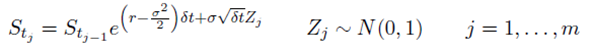

  Where, Z_j is the random variable assigned to the model at time j. The entire set of randomly generated variables Z_j follows a standard normal distribution.
2. Repeat step one to generate a sufficient number of possible paths of the stock price. In this case, step one will be repeated for 250 times, and the simulation results will be stored in memory for option pricing.
3. 	The average price of the path (S ̅), the maximum (S_max) and the minimum (S_min) price along the path, and the price at maturity S_T are used to calculate the path-dependent option prices as shown in Table 1 [1].
4. Find the average option payoff over the 250 sample paths at maturity, and discount this averaged price to find the current price of the option. Also, calculate the sample variance.


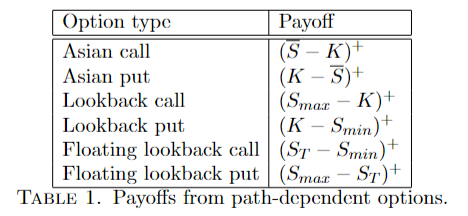

## 3.2 Code Explanation

The following function takes the average price of the path (S ̅), the maximum (S_max), the minimum (S_min) price along the path, the price at maturity S_T, and the strike price (K) as inputs to calculate the payoff the six different option types as shown in Table 1.

In [ ]:
# This funtion calculates the option payoff at maturity based on Table 1
def Payoff(s_bar, s_max, s_min, s_t, k):
  h_Asian_c = max(0,s_bar-k)
  h_Asian_p = max(0,k-s_bar)
  h_Lookback_c = max(0,s_max-k)
  h_Lookback_p = max(0,k-s_min)
  h_F_Lookback_c = max(0,s_t-s_min)
  h_F_Lookback_p = max(0,s_max-s_t)
  return [h_Asian_c, h_Asian_p, h_Lookback_c, h_Lookback_p, h_F_Lookback_c, h_F_Lookback_p]

The following code performs the tasks in Step 1, 2, and 3. The detailed code explanations are in the code comments.

In [ ]:
import numpy as np
# The generated paths will be stored here
Path_samples = [] 
# The calculated option payoff at maturity will be stored here
h_Asian_C = [] # Asian Call
h_Asian_P = [] # Asian Put
h_Lookback_C = [] # Lookback Call
h_Lookback_P = [] # Lookback Put
h_F_Lookback_C = [] # Floating Lookback Call
h_F_Lookback_P = [] # Floating Lookback Put
for i in range(0,n):
  S_tj = [] # The prices generated along the path will be stored here
  S_tj.append(S_0) # Add the current price of the stock to the path as its first element
  # Randomly reterive 9 numbers from a standard normal distribution, 
  # and each of the number will be assigned to one forward step of the Monte Carlo simulation
  Z_j = np.random.normal(loc = 0, scale = 1, size = m)
  # Step 1 & 2 - Path Generation 
  for j in range(1,m+1):
    temp = S_tj[j-1]*np.exp((r_f-(sigma**2)/2)*(T/m)+sigma*np.sqrt(T/m)*Z_j[j-1]) # Implement Eq. [1]
    S_tj.append(temp)
  # Step 3 - Call the payoff function to find the option payoffs at maturity
  option_payoff = Payoff(np.mean(S_tj), max(S_tj), min(S_tj), S_tj[-1], K)
  Path_samples.append(S_tj)
  h_Asian_C.append(option_payoff[0])
  h_Asian_P.append(option_payoff[1])
  h_Lookback_C.append(option_payoff[2])
  h_Lookback_P.append(option_payoff[3])
  h_F_Lookback_C.append(option_payoff[4])
  h_F_Lookback_P.append(option_payoff[5])

### 3.2.1 Pricing of the "European - Like" Options

Step 4 is carried out by the following code, and a data frame was constructed to present the option prices along with a 95% confidence interval of the estimated prices. Note that the decided prices vary a little bit every time the code is executed due to the stochastical nature of the Monte Carlo simulation. In other words, the simulated paths from two different runs of the code may be similar but they are very unlikely to be identical.

In [ ]:
import pandas as pd
data = [['Asian Call', np.mean(h_Asian_C)/np.exp(T*r_f), np.sqrt(np.var(h_Asian_C,ddof=1)/n)*1.96], ['Asian Put', np.mean(h_Asian_P)/np.exp(T*r_f), np.sqrt(np.var(h_Asian_P,ddof=1)/n)*1.96], \
        ['Lookback Call', np.mean(h_Lookback_C)/np.exp(T*r_f), np.sqrt(np.var(h_Lookback_C,ddof=1)/n)*1.96], ['Lookback Put', np.mean(h_Lookback_P)/np.exp(T*r_f), np.sqrt(np.var(h_Lookback_P,ddof=1)/n)*1.96], \
        ['Floating Lookback Call', np.mean(h_F_Lookback_C)/np.exp(T*r_f), np.sqrt(np.var(h_F_Lookback_C,ddof=1)/n)*1.96], ['Floating Lookback Put', np.mean(h_F_Lookback_P)/np.exp(T*r_f), np.sqrt(np.var(h_F_Lookback_P,ddof=1)/n)*1.96]]

df = pd.DataFrame(data, columns=['Option Type', 'Price', '95% CI(±)'])
df #Print the results for Part 1. (a)

,Option Type,Price,95% CI(±)
0,Asian Call,0.634380,0.254910
1,Asian Put,5.322687,0.570779
2,Lookback Call,3.274274,0.655354
3,Lookback Put,10.654606,0.661920
4,Floating Lookback Call,6.144255,0.789595
5,Floating Lookback Put,6.106277,0.667999


### 3.2.2 Visualization of The Simulated Paths

The 250 simulated paths over the two-month period are plotted on the same figure as shown below.

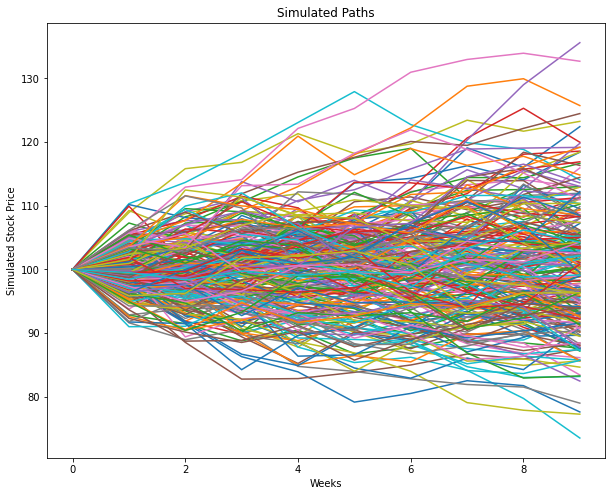

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x_axis = np.arange(10)
for x in range(0,n):
    plt.plot(x_axis,Path_samples[x])
plt.title('Simulated Paths')
plt.xlabel('Weeks')
plt.ylabel('Simulated Stock Price')
plt.show()

Similar to the GBM, the simulated stock prices diverge over time creating a cone shaped  possible price region. The stochastically genearted prices tell everything about the stock including its risk. From this point forward, we can price the American put option based on these paths.


## 3.3 Pricing an American Put Option Using Monte Carlo Simulation

### 3.3.1 Finding the Optimal Exercise Boundary

The pricing of an American option is more challenging than pricing a European option because an American option can be exercised at any time before maturity (of cause the investor can still choose to wait until maturity). The pricing of the American option now becomes a problem of finding the optimal stopping time along the path from [0, T]. 

One common practice is to use dynamic programming (DP) to form an exercise boundary for the American put option [1]. The algorithm goes backward from maturity, at which the exercise boundary would be the strike price K. Let θ_j denotes the exercise boundary at the time t_j, therefore the exercise boundary at maturity would be θ_m=K. Due to the time value of money (a positive risk-free rate), the present value of an early exercised option at the time t_j is strictly greater than the present value of the same option but exercised later in time at the same price. Thus, we have θ_j≤θ_(j+1) at all t_j before maturity. To facilitate the DP, we first try θ_j=θ_(j+1) as a potential value for the exercise boundary at the time t_j. Then, all the simulated paths will be evaluated at the time t_j, to see if the current stock price St_j of this path is lower than or equal to θ_j. If so, we would exercise the option at this time and let the payoff be the present value of this path, if not, we would find the optimal exercise time between [t_(j+1),t_m] and discount this optimal payoff to find the present value of this path. The previously stated strategy for finding the present value of the option at an intermediate time point between [t_0,t_(m-1)] can be summarized using the following equation [1]. 


***Eq.[2]***

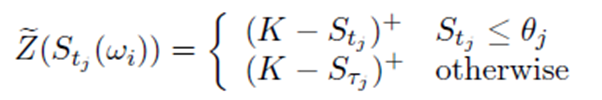

After repeating this process to all the samples, we can find the average present value of the payoff from exercising all paths at this time t_j using the trial θ_j, and the determined present value will be denoted as P_cap. Then, we will try all St_j < θ__(j+1) as the potential value for θ_j and repeat the previous process to find a set of P_cap. Finally, we will take the θ_j that maximizes P_cap to be the exercise boundary at the time t_j. If we continue this DP from t_(m-1) to t_0, we will find the optimal exercise boundary of the American put option.

In [ ]:
# This function is the implementation of Eq.[2], which determines the average present value of the payoffs 
# from exercising all samples at the input time t_j using the trial θj
def find_P_cap(k,r,n,T,m,j,theta_j):
  global Path_samples # Allow access to the paths generated in section 3.2 using the Monte Carlo simulation
  sample_price = [] # The optimal payoff of each path will be stored here
  for i in range(0,n):
    if Path_samples[i][j] <= theta_j: # S_tj <= θj in Eq. [2]
      sample_price.append(k-Path_samples[i][j]) # Exercise this path at t_j
    else:
      tail = Path_samples[i][j-m:] # Get the prices along this path after t_j
      for a in range(0,len(tail)):
        tail[a]=max(0,(k-tail[a]))/np.exp(r*(a+1)*(T/m)) # Discount the payoff along time [t(j+1),t_m] to present time according to its position in the path
      sample_price.append(max(tail)) # Find the optimal exercise time between [t(j+1),t_m] of this path
  mean_sample_price = np.mean(sample_price) # Take average of the present value of the payoffs from exercising all samples at the input time t_j using the trial θj to find P_cap
  return mean_sample_price # Return P_cap

In [ ]:
import numpy as np
J = np.ndarray.tolist(np.linspace(8,0,9)) # Implement backward Dynamic Programing
J = [int(j) for j in J]
theta = [0]*10
theta[-1] = K # Set θm to K
exercise_boundary = [] # The optimal exercise boundaries will be stored here
exercise_boundary.append(K) # The boundary at maturity is the strike price K
for j in J: # Go backwards from t_8 to t_0
  # Try the exercise boundary (θt+1) of one unit time ahead in the futurn
  # as the current exercise boundary
  theta[j] = theta[j+1] 
  theta_cap = theta[j] # Set θ_cap to be the last defined boundary
  # Use Eq. [2] to find current P_cap using the exercise boundary (θt+1)
  # of one unit time ahead in the futurn
  P_cap = find_P_cap(K,r_f,n,T,m,j,theta[j])   
  for i in range(0,n):
    # Try all St_j < θ__(j+1) as the potential value for θ_j
    if Path_samples[i][j] < theta[j+1]:
      theta[j] = Path_samples[i][j]
      # Use Eq. [2] to find current P_cap using the current stock price
      # of the path as the exercise boundary
      P = find_P_cap(K,r_f,n,T,m,j,theta[j])
      if P > P_cap: # Update P_cap if the trial is successful
        P_cap = P
        theta_cap = theta[j] # Update θ_cap if the trial is successful
  # If the trial of using the current stock price as the current exercise boundary
  # fails, the exercise boundary of one unit time in the future will be the current boundary
  exercise_boundary.append(theta_cap) # Store the optimal boundary of this step time
# Flip the defined exercise boundary list so that we can perform forward operations
exercise_boundary.reverse() 

### 3.3.2 Visualization of the Exercise Boundary

The optimal exercise boundary formed in section 3.3.1 is plotted as follows.

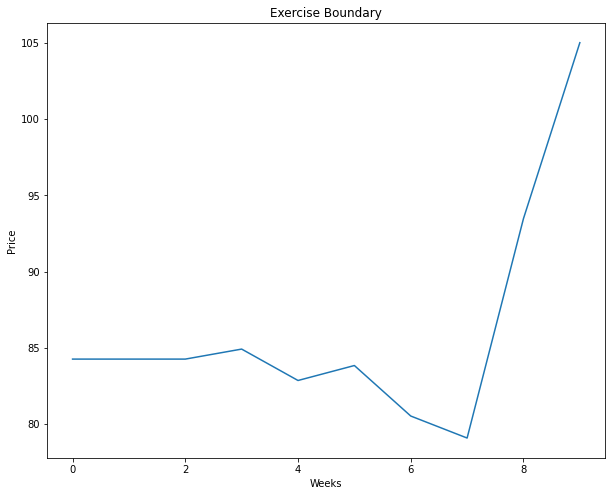

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x_axis = np.arange(10)
plt.plot(x_axis,exercise_boundary)
plt.title('Exercise Boundary')
plt.xlabel('Weeks')
plt.ylabel('Price')
plt.show()

###  3.3.3 Pricing of the American Put Option

Now, we go forward from time t_0 to t_m. By comparing a path to the exercise boundary, we can find the optimal stopping time for this path. In other words, if a path goes below the boundary, we will exercise it at this unit step. In case an optimal stopping time for a path wasn’t found, we will exercise it at maturity. Repeat this process for all paths, and we will be able to find the payoffs of all the paths at their optimal stopping time. Finally, we can repeat what we did in section 3.2.1 to discount these payoffs, and to find the current price of the option by averaging these discounted values.

In [ ]:
early_exercise = [] # Store path whose optimal stopping time was found
exercise_at_T = [] # Store path that will be exercised at maturity
exercise_time = [] 
optimal_found = [0]*n # Path status (settled path will be denoted 1, otherwise 0)
for i in range(0,n):
  j_1 = 0
  while j_1 < 10:
    # Only compare the path value with the boundary if the path optimal hasn't been found (unsettled)
    if Path_samples[i][j_1] <= exercise_boundary[j_1] and optimal_found[i] == 0: # if the path is unsettled (path status 0)
      early_exercise.append((K-Path_samples[i][j_1])/np.exp(r_f*j_1*(T/m))) # Early exercise the path and discount
      exercise_time.append(j_1) # Store the exercise time of this settled path
      optimal_found[i] = 1 # path optimal found, change path status to 1 (path is settled)
    j_1 += 1
# Find the sample numbers of the unsettled paths (or the paths that will be exercised at maturity)
exercise_at_T_index = np.where(np.array(optimal_found) == 0)[0] 
exercise_time = exercise_time + [m]*len(exercise_at_T_index) # Combine the exercise time of the settled and unsettled paths (exercise time is 9 at maturity)
for i in exercise_at_T_index:
  exercise_at_T.append(max(0,(K-Path_samples[i][-1]))/np.exp(r_f*m)) # Exercise the path at maturity and discount
current_option_price = early_exercise + exercise_at_T # Combine the curent values of all paths
# Average all tha paths' current value to esitimate the price of the American put option along with the 95% CI of the estimated price
print("The price of the American put option with a 95% CI is", np.mean(current_option_price), "±", np.sqrt(np.var(current_option_price,ddof=1)/n)*1.96)
# Find the average optimal stopping time of all the paths, and the variance of it.
print("The average optimal stopping time is", np.mean(exercise_time), ", and the variance for optimal stopping time is", np.var(exercise_time, ddof=1))

The price of the American put option with a 95% CI is 6.6036699307820115 ± 0.8358053154253827
The average optimal stopping time is 8.74 , and the variance for optimal stopping time is 0.4903614457831325


# 4.0 The Lattice Method


In this session, we will be presenting to you the steps we take to price all the options using Lattice model and some visualizations to the results we get.


The Lattice model we are using is binomial -- meaning that during the lifespan of the option, we assume the price of stock will only go up or down (therefore only 2 possible direction for each period) by a certain amount at certain possibility but it certainly can be extended to include more diverges with some minor modifications. 

The binomial model will yield price paths similar in the left of following figure. Where the price in each period goes up by *u* percent at *p* probability and goes down by *d* percent at *1-p* probability. The probablity here is not the 'actual' probability in real life but a risk-neutral probability that is calculated by risk-free rate and volatility under the risk-neutral assumption. This would allow one to get the appropriate price of derivatives when the market is efficient. The same reasoning goes to u and d as well.


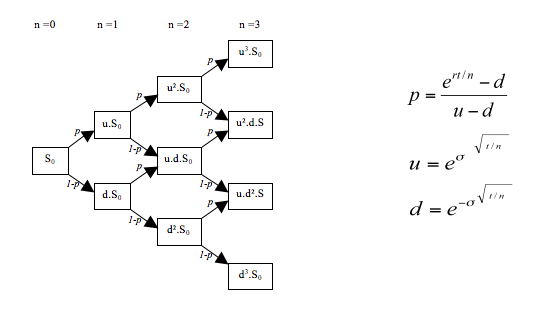

Pricing procedure for all the options excluding American puts are identical: Firstly, the full price path of 2 months/9 periods is simulated using the model described above. The possibility of each path calculated by mutiplying stage possibilities together is also stored for later use. Secondly, payoff of each option is calculated with each possible path. Lastly, the payoffs are discounted back to current time and a weighted average using path possibility from step 1 is taken over all possible paths to determine the risk-neutral price of each type of options.

However, as mention at the beginning, an American option can be exercised at any point so it needs special treatment. This has been taken care of in part (d). Essentially, it differs from normal options by that we are not only checking for payoffs at last stage but instead we check them at every stage to see if there is an opportunity for early exercising. The checking involves two parts: 1) We need to calculate the current(at the stage) payoff by current stock price and strike price. 2） Since we are investigating the possibility of early exercising, we need to consider not only the immediate payoff but also the future payoff that we might be entitled to if we are to exercise later. This expectation of future payoff is represented by summing up the up-trend payoff and down-trend payoff in one period weighted by possibilities and then discounted back to current time. The formula [1] is as following: h is the current payoff and E stands for expectation

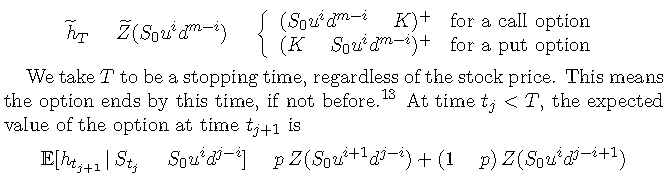

Now that we have the two payoffs, we simply choose the bigger one to be the proper payoff for that stage. And since the calculation of expectation involves payoff from next stage, the whole process is actually executed backward: We first calculate the payoff at the very ending period and then move to second last period and so on. The payoff at time t will be used to calculate expectation at period t-1 and it goes all the way to the beginning which is current and gives one payoff that is our pricing for such option.


The Lattice method is intuitive and the fact that it takes into consideration the volatility factor has made it flexible and useful in most cases. However, there are some major disadvantages to this model as well. The most significant one being that the model is a discrete-time model which means it doesn't catch the flutuations happened during the single period length. It is probably fine if we only care about final stage price like in most non-American options but it can be less efficient when pricing American options due to we might miss out profit point in between period times. One solution to this can be to add more periods/reduce period interval to catch as much price change as possible. But then it is still discrete(with more precision) and the computation cost grows exponentially to the size of periods. Therefore, the performance of such method is up to available resources one have (which might not be a good news to smaller group or individual).

## 4.1 Function Walk-through

The implementation below can be summarized as following order:

1. u, d, p are calculated based on assumed rf rate, volatility, etc. All possible paths and corresponding possibilities are generated.

2. Looping over the possible paths and recorded price at each stage.

3. Calculating payoffs of each options using payoff() function and price from last stage.

4. Outputing price which is the discounted, weighted average of payoffs.

Pricing American Put: 

1. Calculating discount factor for one period.

2. Loop over all periods, starting form the last period to the first.

3. For the last period: for each path, calculate payoffs by current price and strike price.

4. For every period except last period: for each path, First calculate current payoff by current price and strike price. Then calculate expected payoff from next period payoffs and discount. The 'future' payoffs are available due to the loop is going backward. Recording the max of the 2 to be the true payoff of such path at current stage.

5. Returning the very first period payoff as current price. No discounting needed due to it is incorporated already during expectation calculation.



## 4.2 Pricing "European-Like" Options Using Lattice Method

In [ ]:
import itertools
import pandas as pd
import numpy as np
# Calculating u, d, p and all possible path
u = np.exp(sigma*np.sqrt(T/m))
d = 1/u
p = (np.exp(r_f*(T/m))-d)/(u-d)
path_lattice = pd.DataFrame(list(itertools.product([0, 1], repeat=9))) #combinations of zero's and one's along the 9-week period to generate a total of 512 possible paths
prob_path = pd.DataFrame(list(itertools.product([1-p, p], repeat=9))) # possibilities of up/down events
prob_path = prob_path.prod(1) # Multiplying all possibilities along the path to get possibility for each path
num_path = len(path_lattice)

In [ ]:
# 0 represents price down, 1 represents price up. It goes on for 9 periods
path_lattice


,0,1,2,3,4,5,6,7,8
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,0,1,1
508,1,1,1,1,1,1,1,0,0
509,1,1,1,1,1,1,1,0,1
510,1,1,1,1,1,1,1,1,0


In [ ]:
# Possibility for each path
prob_path

0      0.002063
1      0.002038
2      0.002038
3      0.002013
4      0.002038
         ...   
507    0.001871
508    0.001894
509    0.001871
510    0.001871
511    0.001848
Length: 512, dtype: float64

In [ ]:
path_lattice = path_lattice.values.tolist()

In [ ]:
Path_samples_lattice = [] # Generated paths holder
h_Asian_C_lattice = []    # For payoff calculating purpose
h_Asian_P_lattice = []
h_Lookback_C_lattice = []
h_Lookback_P_lattice = []
h_F_Lookback_C_lattice = []
h_F_Lookback_P_lattice = []

# loop over possible path
for i in range(num_path):
  S_tj = []
  S_tj.append(S_0)

  # 9 periods update
  for j in range(m):
    # price goes down if path indicates 0
    if path_lattice[i][j] == 0:
      temp = S_tj[j]*d
    # price goes up if path indicates 1
    elif path_lattice[i][j] == 1:
      temp = S_tj[j]*u 
    S_tj.append(temp)
  
  # Calculating pay off for current ith path
  option_payoff = Payoff(np.mean(S_tj), max(S_tj), min(S_tj), S_tj[-1], K)
  Path_samples_lattice.append(S_tj)
  h_Asian_C_lattice.append(option_payoff[0])
  h_Asian_P_lattice.append(option_payoff[1])
  h_Lookback_C_lattice.append(option_payoff[2])
  h_Lookback_P_lattice.append(option_payoff[3])
  h_F_Lookback_C_lattice.append(option_payoff[4])
  h_F_Lookback_P_lattice.append(option_payoff[5])

### 4.2.1 Visualization of The Simulated Paths

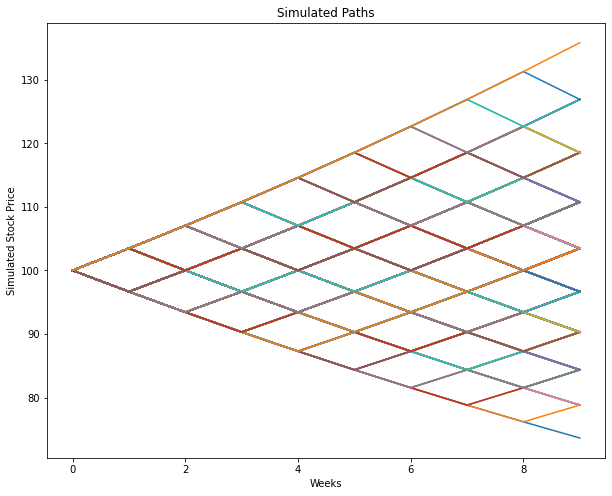

In [ ]:
# visualize stock price change 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x_axis = np.arange(10)
for x in range(512):
    plt.plot(x_axis,Path_samples_lattice[x])
plt.title('Simulated Paths')
plt.xlabel('Weeks')
plt.ylabel('Simulated Stock Price')
plt.show()

### 4.2.2 Pricing of the "European-Like" Options

In [ ]:
# Different from part (a), total payoff is calculated by taking weighted sum
# of payoff using path probability above. It is then discounted to
# reflect current price.

data = [['Asian Call', np.average(h_Asian_C_lattice,weights=prob_path)/np.exp(T*r_f)], ['Asian Put', np.average(h_Asian_P_lattice,weights=prob_path)/np.exp(T*r_f)], \
        ['Lookback Call', np.average(h_Lookback_C_lattice,weights=prob_path)/np.exp(T*r_f)], ['Lookback Put', np.average(h_Lookback_P_lattice,weights=prob_path)/np.exp(T*r_f)], \
        ['Floating Lookback Call', np.average(h_F_Lookback_C_lattice,weights=prob_path)/np.exp(T*r_f)], ['Floating Lookback Put', np.average(h_F_Lookback_P_lattice,weights=prob_path)/np.exp(T*r_f)]]

df = pd.DataFrame(data, columns=['Option Type', 'Price'])
df

,Option Type,Price
0,Asian Call,0.698712
1,Asian Put,5.515766
2,Lookback Call,3.620670
3,Lookback Put,11.331890
4,Floating Lookback Call,6.681307
5,Floating Lookback Put,6.641786



## 4.3 Pricing American Put Options Using Lattice Method

In [ ]:
# American options differ from European ones by the opportunity to exercise early.
# So the price of such option is dependant on the max expected payoff at any stage before expiration
# This is done by back-propogation

d_f = np.exp(T/m*r_f)  # Discount factor for 1 period
pay_offs = np.zeros((10,10))
for i in reversed(range(m+1)):  # Iterate backwards: 9 -> 8 ->....-> 0 where the 0 period max payoff would be the current price of the put option
  if i == m:    # To instantiate the back propogation by calculating payoffs at last time period
    for j in range(i+1):
      S_i_j = S_0 * (u**j) * (d**(i-j))
      if K > S_i_j:
        payoff = K-S_i_j
      else:
        payoff = 0
      pay_offs[i][j] = payoff
  else:  # Back-propogation by comparing current payoff (at the moment) and discounted expected payoff from next period
    for j in range(i+1):
      S_i_j = S_0 * (u**j) * (d**(i-j))
      if K > S_i_j:
        cur_payoff = K-S_i_j
      else:
        cur_payoff = 0
      expected_payoff = 1/d_f *(p*(pay_offs[i+1][j+1]) + (1-p)*(pay_offs[i+1][j]))
      pay_offs[i][j] = max(cur_payoff, expected_payoff)

print("The current price of the American put option is: ", round(pay_offs[0][0],6))

The current price of the American put option is:  6.98524


# 5.0 Comparisons between Monte Carlo and Lattice Method

In terms of performance, both models give quantitatively similar result – all the results by Lattice model are within 95% CI of Monte Carlo Simulation. However, when comparing the pricing for American put option, we notice the Lattice model underestimate the price which is expected due to only limited number of periods is used.  


The two models differ the most in terms of how randomness is account for – Monte Carlo simulation is in some sense more “practical-based” where randomness is addressed by a known normal distribution and the path generated each time is random and non-replicating just like one would expect in real life. While the Lattice model use expectation to catch the influence from probability and comes to a closed form solution.


Each method has its own strength and weakness. For Monte Carlo simulation, it is easy to implement, and the approximation is already good enough even though we only sampled 250 times. But it also has issues like the dependency on normality assumption, result being only approximation never exact value and the exponentially larger computational and memory cost if the problem increases in size or demands higher accuracy. The Lattice model has a closed-form solution which is both intuitive and theoretically efficient. However, the determination can be a problem when the market is more stochastic, and many assumptions do not hold. 


Overall, we argue that both methods are strong candidates to the pricing problem. We also think that they complement each other: One could use Lattice model first to get a quick grasp of what to expect and then do multiple Monte Carlo simulations to support the theory and expand the boundary to reflect realistic scenarios.


# 6.0 Lesson Learned

In this project, we started from using the Monte Carlo simulation to generate samples of possible stock price paths and based on the simulated paths we can easily calculate the pricing of “European-like” options due to the fact that they expire only at maturity. This is not the case for the American option due to its ability to be exercised any time before and on the expiration date. Therefore, we implement a backward dynamic programming procedure to form an exercise boundary of the sample paths, and hence the optimal exercise time of each path as well as the option price can be calculated. In the second half of this project, we repeated what we have achieved in the first half but using Lattice method. This binomial approach changes the problem into a discrete model. In the case of “European-like” options, it is a discrete version of the Black-Scholes model which is fairly simple. However, to price an American put option using this binominal approach can be compute and memory intensive and find the optimal stopping time will become a problem if the number of periods used is too large.

# 7.0 Reference

[1] McWilliams, N. (2005). Pricing American options using Monte Carlo Simulation. Summer project.

[2] “Asset Pricing.” Wikipedia. Wikimedia Foundation, March 23, 2022. https://en.wikipedia.org/wiki/Asset_pricing. 

